In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn.model_selection import KFold

# Loading and Preparing the Data

In [60]:
mi_h=pd.read_csv("DEMsExpression.csv")
cad=pd.read_csv("MI-Healthy DEMs Expression of CAD samples.csv")
df=pd.concat([mi_h, cad], axis=0)

target = []
for sample in df['Unnamed: 0']:
    if sample[-1] == "H":
        target.append("Healthy")
    elif sample[-1] == "M":
        target.append("MI")
    elif sample[-1] == "C":
        target.append("CAD")

df["MI status"] = target
df.drop('Unnamed: 0', axis=1, inplace = True)

In [9]:
df.head()

,7900488 / MIR30E,7923976 / C1orf132///MIR29B2,7971661 / MIR15A,7976832 / MIR323A,8008885 / MIR21,8045453 / MIR128-1,8084755 / MIR28,8087881 / MIRLET7G,8163107 / MIR32,8175248 / MIR92A2,MI status
0,5.86237,4.17884,5.93182,3.31011,8.79683,4.71189,3.45519,7.52580,6.67709,3.16477,Healthy
1,5.61056,3.90262,6.09685,3.54984,9.09161,4.82916,3.52235,7.55883,6.60037,3.14140,Healthy
2,6.47634,4.42823,6.45591,3.78296,9.46479,4.56398,3.64562,7.69815,6.91699,3.05517,Healthy
3,6.29086,4.16566,6.38480,3.47636,9.16028,4.41579,3.72838,7.59828,6.30052,3.05037,Healthy
4,5.42813,3.83066,6.30655,3.82938,8.31414,4.49369,3.53013,7.36374,6.18958,2.99243,Healthy


In [61]:
df.shape

(250, 11)

# Exploratory Data Analysis

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
7900488 / MIR30E,250.0,7.450548,0.607236,5.356128,7.199537,7.633360,7.867915,8.360230
7923976 / C1orf132///MIR29B2,250.0,5.384517,0.655981,3.628750,5.232723,5.600820,5.820860,6.509030
7971661 / MIR15A,250.0,6.990930,0.600481,5.072702,6.717252,7.124750,7.360918,8.311290
7976832 / MIR323A,250.0,3.548375,0.548304,2.870420,3.200370,3.345095,3.610920,5.171396
8008885 / MIR21,250.0,10.115399,0.952993,6.982273,9.503113,10.320200,10.771200,12.349500
8045453 / MIR128-1,250.0,5.643931,0.556826,4.081839,5.548987,5.816710,6.024390,6.386390
8084755 / MIR28,250.0,5.181250,0.812016,3.365152,5.001390,5.478615,5.723738,6.492950
8087881 / MIRLET7G,250.0,7.821840,0.667161,5.664453,7.559920,7.975815,8.265690,9.254780
8163107 / MIR32,250.0,7.565765,0.821758,4.744559,7.351542,7.817910,8.111895,8.957920
8175248 / MIR92A2,250.0,2.938011,0.435897,2.463260,2.647992,2.757300,2.960275,4.055258


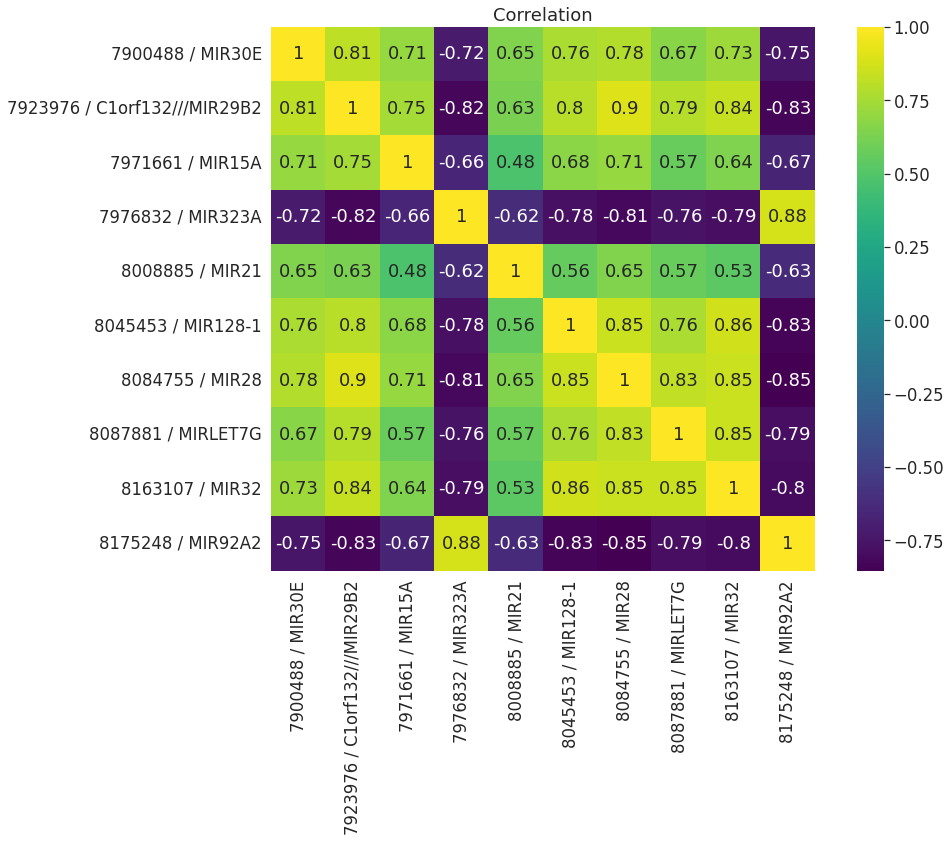

In [11]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),vmax=1,square=True, annot=True, cmap='viridis')
plt.title('Correlation')
plt.show()

In [63]:
corr = df.corr()
corr = corr[corr < 1]
corr = corr[corr > -1]
corr[corr >= 0.8].sum()+abs(corr[corr <= -0.8].sum())

7900488 / MIR30E                0.814259
7923976 / C1orf132///MIR29B2    5.002301
7971661 / MIR15A                0.000000
7976832 / MIR323A               2.514856
8008885 / MIR21                 0.000000
8045453 / MIR128-1              3.347095
8084755 / MIR28                 5.097673
8087881 / MIRLET7G              1.678399
8163107 / MIR32                 3.405436
8175248 / MIR92A2               3.394481
dtype: float64

In [73]:
df_new=df.drop(['7923976 / C1orf132///MIR29B2', '8084755 / MIR28', '8163107 / MIR32', '8175248 / MIR92A2'], axis=1)
df_new=df_new.reindex()

In [66]:
corr = df_new.corr()
corr = corr[corr < 1]
corr = corr[corr > -1]
corr[corr >= 0.8].sum()+abs(corr[corr <= -0.8].sum())

7900488 / MIR30E      0.0
7971661 / MIR15A      0.0
7976832 / MIR323A     0.0
8008885 / MIR21       0.0
8045453 / MIR128-1    0.0
8087881 / MIRLET7G    0.0
dtype: float64

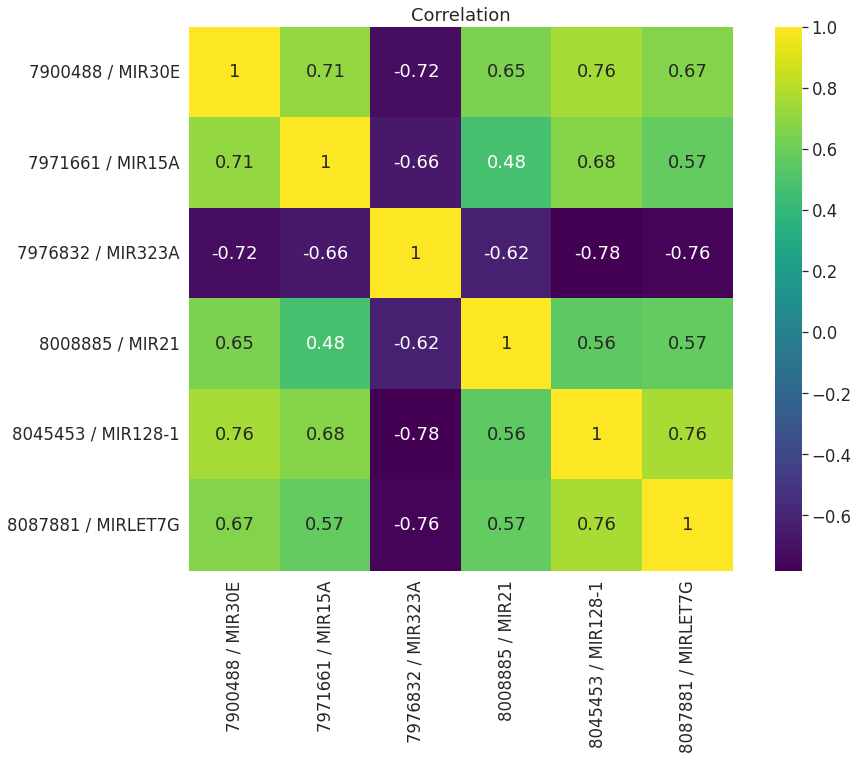

In [56]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.heatmap(df_new.corr(),vmax=1,square=True, annot=True, cmap='viridis')
plt.title('Correlation')
plt.show()

In [74]:
df_new.head()

,7900488 / MIR30E,7971661 / MIR15A,7976832 / MIR323A,8008885 / MIR21,8045453 / MIR128-1,8087881 / MIRLET7G,MI status
0,5.86237,5.93182,3.31011,8.79683,4.71189,7.52580,Healthy
1,5.61056,6.09685,3.54984,9.09161,4.82916,7.55883,Healthy
2,6.47634,6.45591,3.78296,9.46479,4.56398,7.69815,Healthy
3,6.29086,6.38480,3.47636,9.16028,4.41579,7.59828,Healthy
4,5.42813,6.30655,3.82938,8.31414,4.49369,7.36374,Healthy


In [76]:
df_melt=pd.melt(df_new, id_vars='MI status')

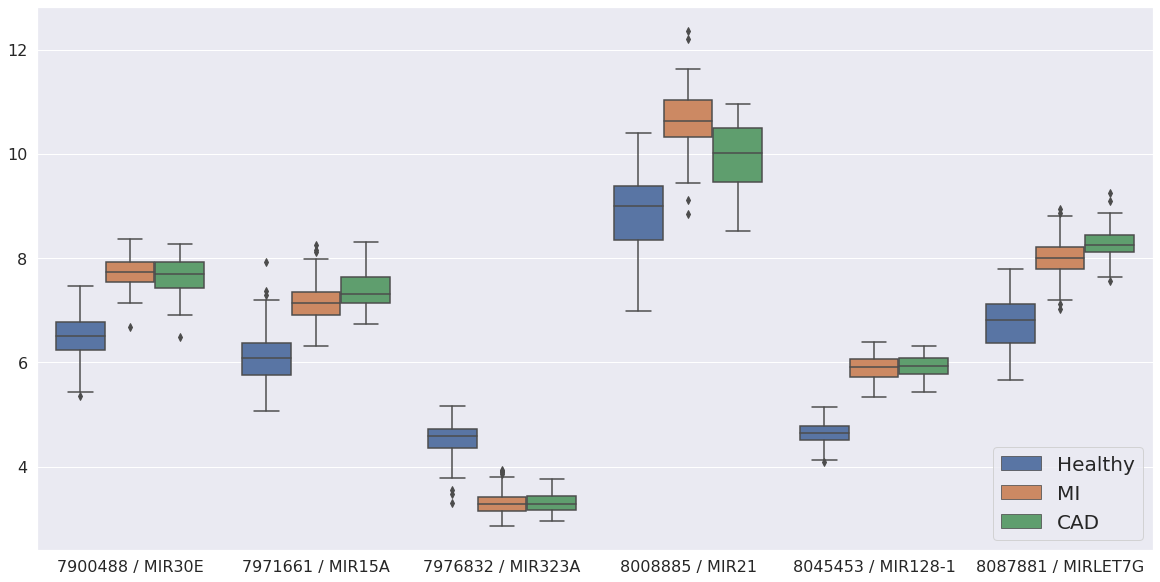

In [79]:
plt.figure(figsize=(20,10))
sns.boxplot(x="variable", y="value", hue='MI status', data=df_melt);
plt.ylabel('', fontsize = 20)
plt.xlabel('', fontsize = 20)
plt.legend(loc='lower right', prop={'size':20})
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.savefig('Expression.pdf', bbox_inches='tight')

In [96]:
df_mc=df_new[df_new['MI status'] != 'Healthy']
X=df_mc.drop('MI status', axis=1)
y=df_mc['MI status']

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=1)

In [98]:
X=pd.concat([X_train,y_train],axis=1)
X['MI status'].value_counts()

MI     101
CAD     48
Name: MI status, dtype: int64

# MI/CAD

In [106]:
MI=X[X['MI status'] == 'MI']
CAD=X[X['MI status'] == 'CAD']

In [107]:
less_MI=resample(MI, replace=False, n_samples=len(CAD), random_state=1)
df_downsample=pd.concat([CAD,less_MI])

In [108]:
df_downsample['MI status'].value_counts()

CAD    48
MI     48
Name: MI status, dtype: int64

In [109]:
X_train=df_downsample.drop('MI status', axis=1)
y_train=df_downsample['MI status']

In [111]:
#defining scoring for all furthur uses in cross validation
scoring = ['precision_macro', 'recall_macro', 'f1_macro', 'accuracy']

In [113]:
svm=SVC(random_state=1)
scores = cross_validate(svm, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True, return_estimator =True)
scores1=pd.DataFrame(scores).drop(['estimator'], axis=1)
scores1.mean(axis=0)

fit_time                 0.006513
score_time               0.009640
test_precision_macro     0.767202
train_precision_macro    0.745871
test_recall_macro        0.710000
train_recall_macro       0.741755
test_f1_macro            0.694616
train_f1_macro           0.740714
test_accuracy            0.716667
train_accuracy           0.741901
dtype: float64

In [ ]:
param_dist = {
  'C': [0.1, 1, 10, 100, 1000, 10000],
  'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
  'kernel': ['rbf', 'linear', 'sigmoid']
}

random_search = RandomizedSearchCV(
    SVC(class_weight='balanced'), param_distributions=param_dist, n_iter=50, cv=10)

random_search.fit(X_train, y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RandomizedSearchCV(cv=10, estimator=SVC(class_weight='balanced'), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x119a8f6d0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x119a96a60>,
                                        'kernel': ['rbf', 'linear', 'sigmoid']})